**Проект**: Исследование и анализ рынка недвижимости Санкт-Петербурга и соседних населённых пунктов.

**Цель проекта**: Научиться определять рыночную стоимость объектов недвижимости в зависимости от разных параметров продаваемой квартиры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

**Задача**: установить параметры, влияющие на формирование стоимости квадратного метра в Санкт-Петербурге и соседних населённых пунктов на основе имеющихся данных архива объявлений сервиса Яндекс. 

<b>Описание данных:</b> Даны данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за 2014-2019гг.

По каждой квартире доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Загрузка данных и изучение общей информации. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 n

None

----------------------------------------


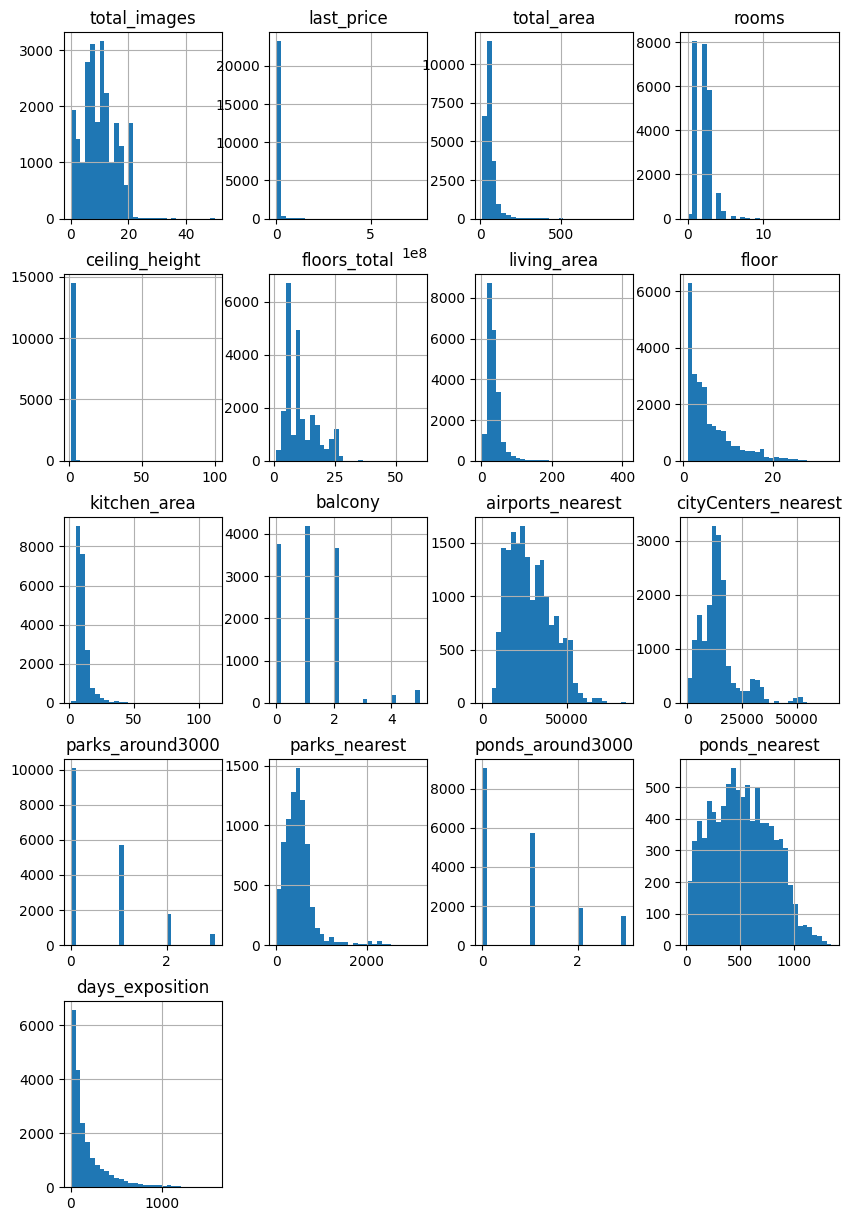

In [3]:
display(data.head(10))
print('-'* 40)
display(data.info())
print('-'* 40)
data.hist(bins=30, figsize=(10,15));

В выгруженном файле все данные склеены в строки. Укажем в аргументах функции read_csv параметр sep = '\t', чтобы разделить данные на столбцы.  

Имеется 23699 строк данных об объявлениях о продаже недвижимости в г.Санкт-Петербурге и Ленинградской области.  

В данных есть пропуски, не во всех столбцах данные имеют необходимый формат.  

По гистограммам видна общая картина распределения данных в зависимости от отдельных признаков.

# Предобработка данных

## Обработка пропусков и аномальных значений.

In [4]:
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

В большинстве столбцов присутствуют пропуски: ceiling_height -38,8% пропусков в данных, floors_total-0,4%, living_area - 8,0%, is_apartment -88,3%, kitchen_area - 9,6%, balcony - 48,6%, locality_name - 0,2%, airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000 - 23,3%, parks_nearest-65,9%, ponds_nearest - 61,6%, days_exposition - 13,4%

Проверим данные в столлбце ceiling_height на аномальные значения и определим их количество(при наличии).

In [5]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [6]:
data[data['ceiling_height']<2.4]['last_price'].count()

21

Нам видны аномально низкие значения от 1 до 2.34. Их число очень мало в общем количестве, поэтому эти строки можно удалить, чтобы не искажать общую картину(удалим после заполнения пропусков). 

In [7]:
data[data['ceiling_height']>4]['last_price'].count()

75

Также видны аномально высокие значения больше 4 м. Их число очень мало в общем количестве, поэтому эти строки тоже можно удалить, чтобы не искажать общую картину(удалим после заполнения пропусков). 

Также присутствуют значения 24,25,26,27, 27.5м. Можно предположить, что высота указана не в тех единицах измерения и скорее всего это 2.4,2.5,2.6,2.7, 2.75м. Исправим эти значения,разделив на 10.

In [8]:
data.update(data[(data['ceiling_height'] >= 20)]['ceiling_height']/10)

Заполним пропуски в 'ceiling_height' медианным значением.

In [9]:
data.loc[(data['ceiling_height'].isna()),'ceiling_height']=(
    data.loc[(data['ceiling_height']<=4.00)&(data['ceiling_height']>2.34),'ceiling_height'].median()
)

Удалим аномальные значения меньше 2.34 м. и больше 4.0 м.

In [10]:
data = data.loc[(data['ceiling_height'] > 2.34) & (data['ceiling_height'] <= 4.0)]


Заполним пропуски в столбце 'living_area' отношением жилой площади к коэффициенту соотношения медианной общей площади к медианной жилой площади, рассчитанный для квартир с разным количеством комнат.

In [11]:
for index in data['rooms'].unique():
    data.loc[(data['rooms'] == index) & (data['living_area'].isna()), 'living_area'] = \
     data['total_area']/(data.loc[(data['rooms'] == index) & (data['living_area']>0), 'total_area'].median()\
                         /data.loc[(data['rooms'] == index) & (data['living_area']>0), 'living_area'].median())

Аналогично заполним пропуски в столбце 'kitchen_area'.


In [12]:
for index in data['rooms'].unique():
    data.loc[(data['rooms'] == index) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data['total_area']/(data.loc[(data['rooms'] == index) & (data['kitchen_area']>0), 'total_area'].median()\
                         /data.loc[(data['rooms'] == index) & (data['kitchen_area']>0), 'kitchen_area'].median())


Заполним пропуски в столбце 'balcony' значением '0', т.к. незаполнение данного столбца говорит скорее всего о том, что балкона в квартире нет.

In [13]:
data.loc[data['balcony'].isna(), 'balcony'] = 0

Аналогично заполним пропуски в столбце 'parks_around3000' и  'ponds_around3000' значением '0', руководствуясь теми же рассуждениями.

In [14]:
data.loc[data['parks_around3000'].isna(), 'parks_around3000'] = 0

In [15]:
data.loc[data['ponds_around3000'].isna(), 'ponds_around3000'] = 0

Проанализируем данные в столбце is_apartment

In [16]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Пропуски в столбце 'is_apartment' обусловлены скорее всего тем, что объект является квартирой, а не апартаментами. Пустые значения заполним '0', а значениям  True и False присвоим значения '1' и '0'.

In [17]:
data.loc[data['is_apartment']==True,'is_apartment'] = 1

In [18]:
data.loc[data['is_apartment']==False,'is_apartment'] = 0

In [19]:
data['is_apartment']=data['is_apartment'].fillna(value=0)

Изменим формат столбца 'first_day_exposition' на datetime64, чтобы с его значениями можно было работать и формировать статистику за временные периоды.

In [20]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],\
                                              format='%Y-%m-%dT%H:%M:%S')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,0,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,0,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,0,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,98.553719,9,0,...,20.748626,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,0,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Пропуски в столбце количества дней экспозии и этажности дома нет возможности заполнить логически, но эти значения имеют важное значение для оценки результата. Чтобы не потерять данные по остальным столбцам, строки с пустыми значениями в этих столбцах лучше не удалить из выборки.

Пропуски в остальных столбцах: airports_nearest,cityCenters_nearest,parks_neares, ponds_neares, невозможно заполнить логически, поэтому лучше оставить пропуски как есть. Кроме того, эти параметры не так критичны для анализа поставленной задачи.

## Проверка дубликатов.

Проверим данные на явные дубликаты.

In [21]:
data.duplicated().sum()

0

Проверим данные на неявные дубликаты.

In [22]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Приведем неявные дубликаты к одному значению.

In [23]:
data['locality_name'] = data['locality_name'].replace('посёлок Пансионат Зелёный Бор', 'поселок Пансионат Зелёный Бор')
data['locality_name'] = data['locality_name'].replace('посёлок Бугры', 'поселок Бугры')
data['locality_name'] = data['locality_name'].replace('посёлок Тельмана', 'поселок Тельмана')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Рябово', 'поселок Рябово')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Рябово', 'поселок Рябово')


Посмотрим, сколько данных осталось после предобработки данных.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23623 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23623 non-null  int64         
 1   last_price            23623 non-null  float64       
 2   total_area            23623 non-null  float64       
 3   first_day_exposition  23623 non-null  datetime64[ns]
 4   rooms                 23623 non-null  int64         
 5   ceiling_height        23623 non-null  float64       
 6   floors_total          23537 non-null  float64       
 7   living_area           23623 non-null  float64       
 8   floor                 23623 non-null  int64         
 9   is_apartment          23623 non-null  int64         
 10  studio                23623 non-null  bool          
 11  open_plan             23623 non-null  bool          
 12  kitchen_area          23427 non-null  float64       
 13  balcony              

После предобработки выборка почти полностью сохранила свой объем (23 623 строки из 23 699, потеря данных 0,32%) 


## Добавление в таблицу новых столбцов.

Добавим столбец last_price_per_metr с ценой одного квадратного метра

In [25]:
data['last_price_per_metr'] = data['last_price']/data['total_area']


Добавим столбцы mounth_exposition, year_exposition, обозначающие месяц и год публикации объявления.

In [26]:
data['mounth_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month


In [27]:
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year


Добавим столбец day_exposition, отображающий день недели(0-понедельник, 1-вторник и так далее)

In [28]:
data['day_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday


In [29]:
data = data.astype({'floors_total':'int'},errors='ignore')
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_per_metr,mounth_exposition,year_exposition,day_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,0,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,2019,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,0,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,12,2018,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,0,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,8,2015,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,98.553719,9,0,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,7,2015,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,0,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,6,2018,1


Добавим столбец с типом квартиры со значениями: "первый","последний","другой" 

In [30]:
def type_floor(row):
    info1 = row['floor']
    info2 = row['floors_total']
    if info1 == 1:
        return 'первый'
    if info1 == info2:
        return 'последний'
    return 'другой'

data['type_floor'] = data.apply(type_floor,axis=1)



Добавим столбец с расстоянием до центра города в километрах

In [31]:
import numpy as np
data['cityCenters_nearest_km'] = np.round(data['cityCenters_nearest']/1000)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_per_metr,mounth_exposition,year_exposition,day_exposition,type_floor,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,0,...,482.0,2.0,755.0,NaN,120370.370370,3,2019,3,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,0,...,NaN,0.0,NaN,81.0,82920.792079,12,2018,1,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,0,...,90.0,2.0,574.0,558.0,92785.714286,8,2015,3,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,98.553719,9,0,...,84.0,3.0,234.0,424.0,408176.100629,7,2015,4,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,0,...,112.0,1.0,48.0,121.0,100000.000000,6,2018,1,другой,8.0


# Исследовательский анализ данных.

## Построим гистограммы столбцов для уже очищенных данных, чтобы оценить их.

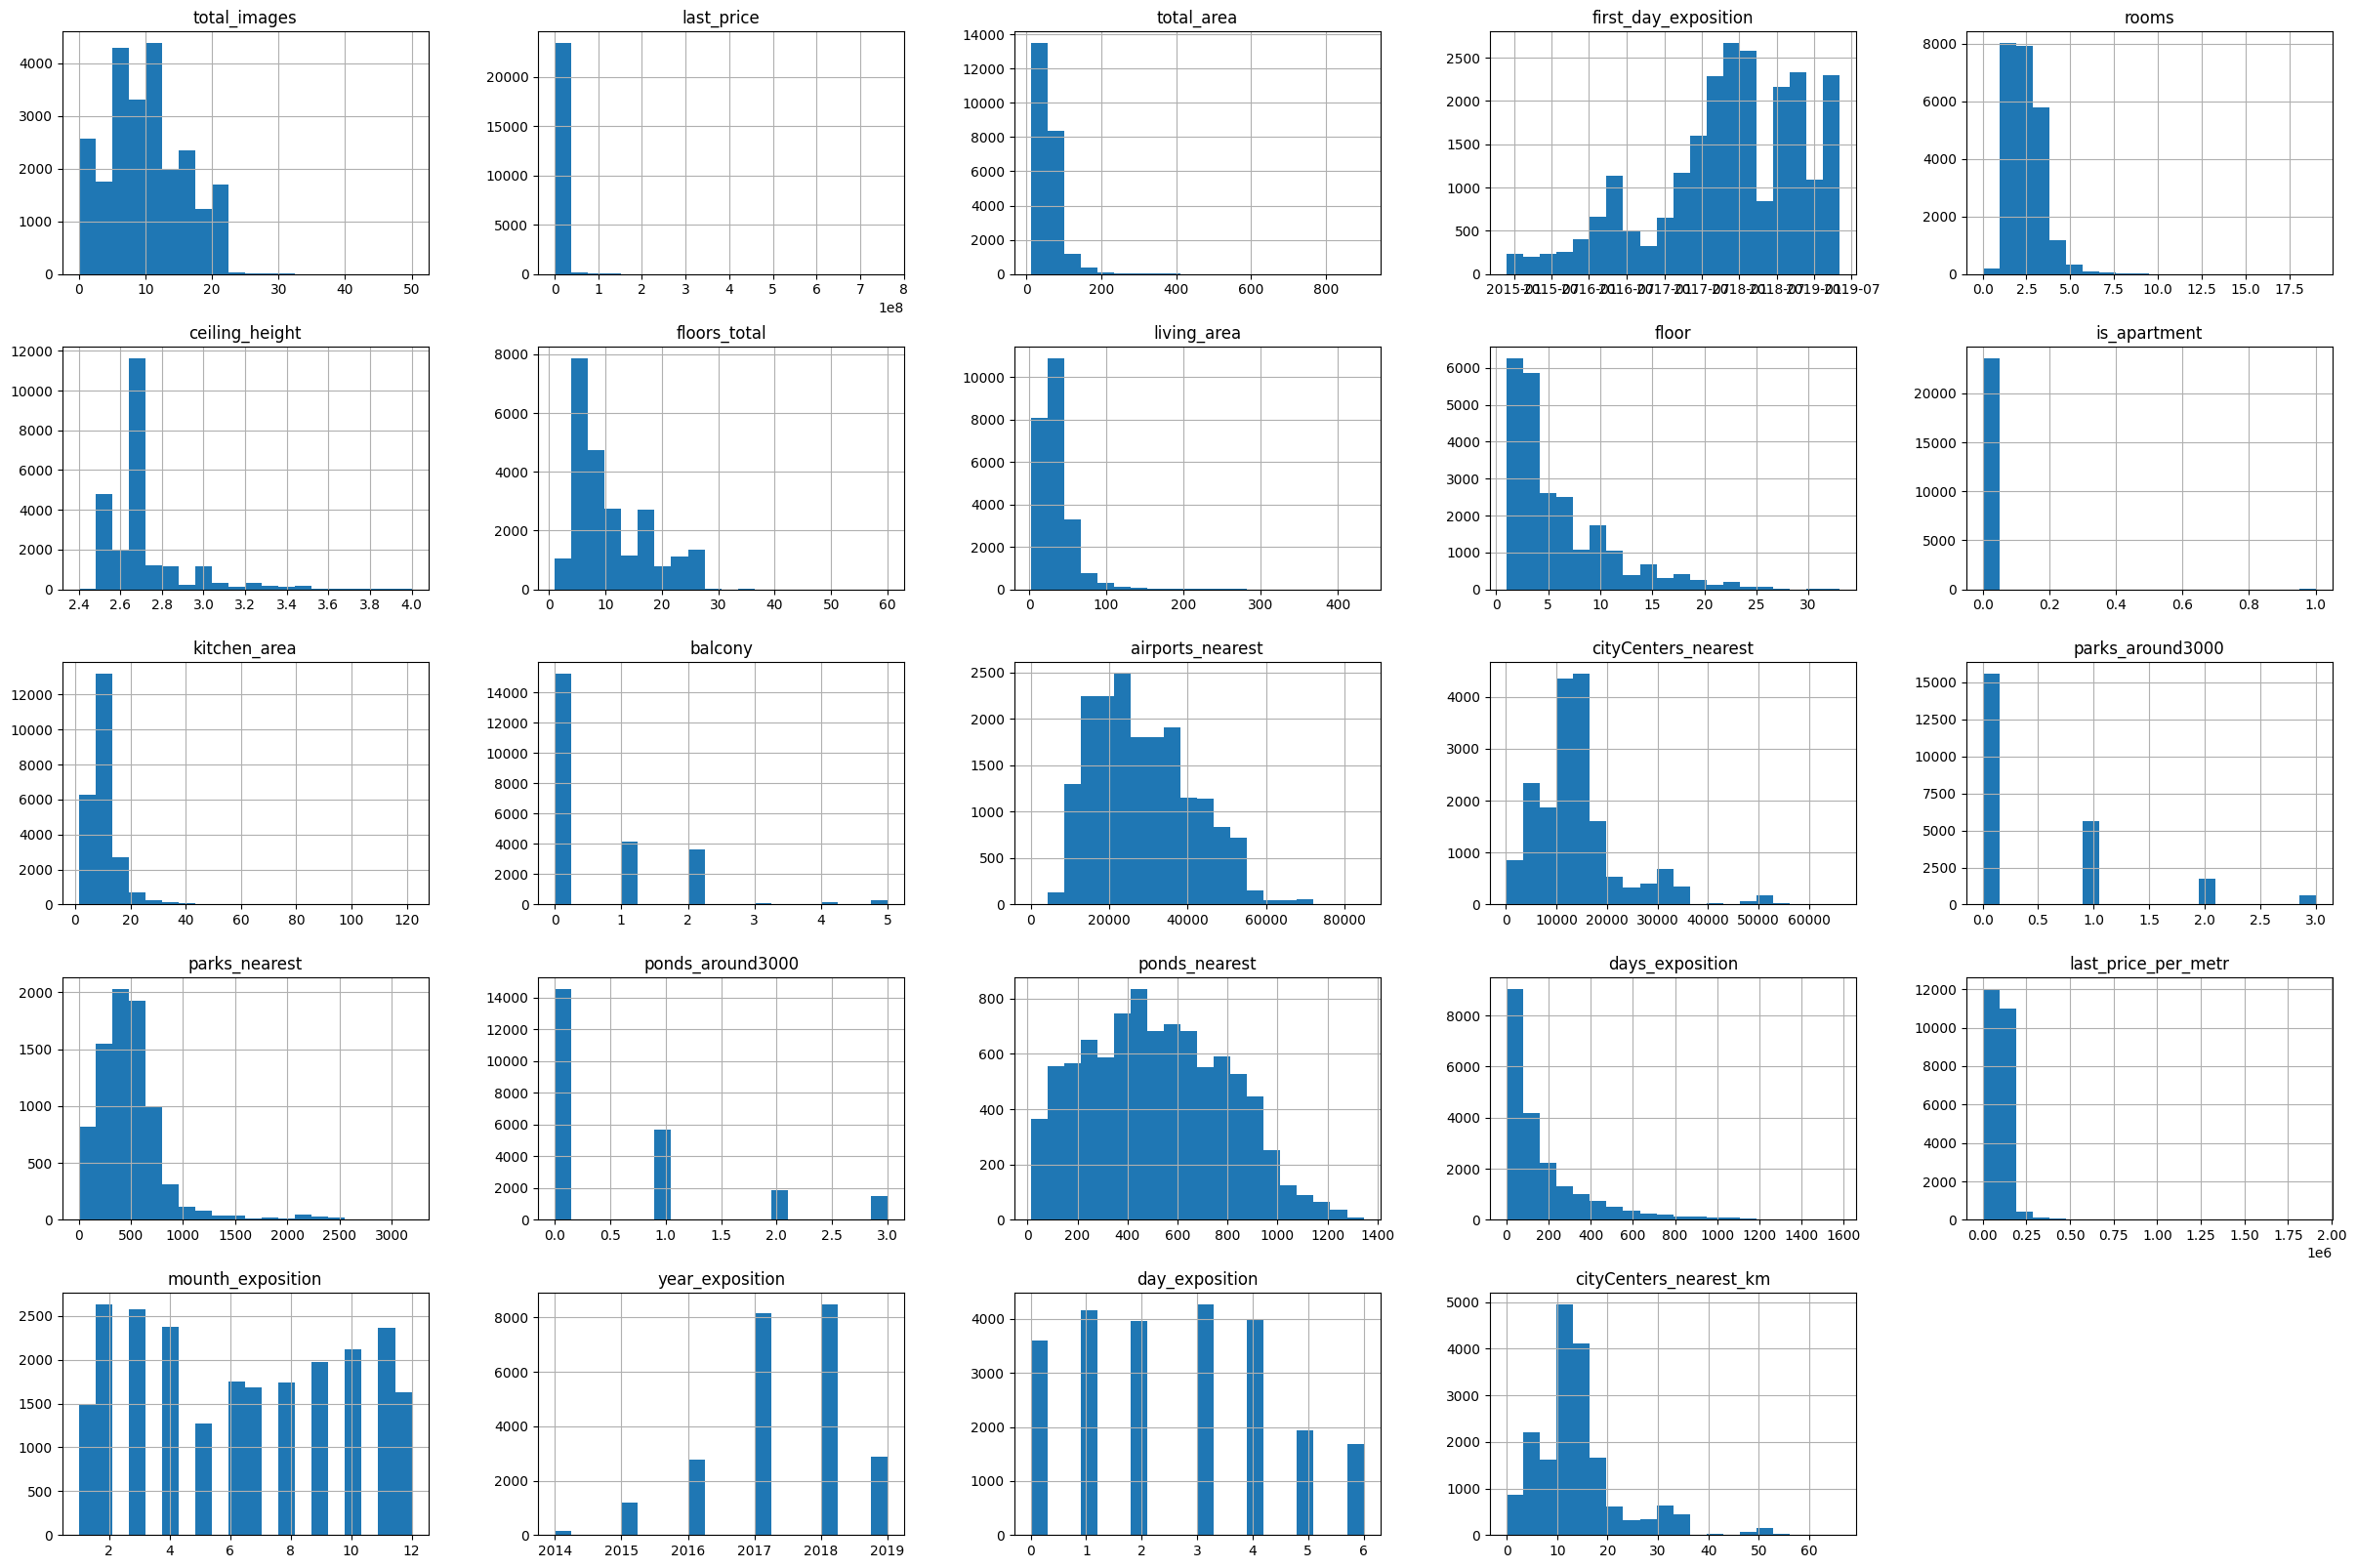

In [32]:
data.hist(bins=20, figsize=(30,20));

В среднем пользователи размещают от 5 до 12 фотографий объекта, но есть достаточно большое число объявлений без фотографий.
Общая площадь самой большой категории объектов до 50кв.м., в 2 раза меньше категория до 100кв.м. 
Пик выставленных на продажу объектов был с середины 2017 по середину 2019гг, но во второй половине 2018г. был спад.
Выставляется на продажу примерно одинаковое количество 1 и 2-комнатных квартир, 3-комнатных значительно меньше.
Наиболее частая высота потолков в квартирах -2,7м.
Наиболее частая этажность домов – 5 этажей и до 10 этажей.
Жилая площадь квартир в основном до 40 кв.м.
Большинство объектов расположены не выше 4 этажа, значительно меньше-не выше седьмого, и совсем мало выше 10-го этажа.
Площадь кухни в основном составляет примерно от 6 до 12 кв.м.
Больше половины квартир продается без балконов. Либо собственники забывают указать данную информацию.
Большинство объектов расположены на расстоянии от 10 до 50 км. от аэропорта и от 5 до 20км. от центра города(чаще 10-15км.).
Парк в пределах 3км. есть только у 1/3 квартир на расстоянии от 0,2 до 0,75 км. Примерно та же картина с прудами. Но собственники не всегда указывают такую расширенную информацию об объектах.
Чаще всего объекты продаются в течение 2 месяцев, в 2 раза меньше – в течение примерно 4 месяцев, в 4 раза меньше – в пределах 6-7 месяцев и очень малая часть дольше указанного срока.
Стоимость квадратного метра в основном варьируется от 90 до 110 тыс.руб. за кв.м.
Пика количество выставленных на продажу объектов достигает в декабре и планомерно снижается к маю(перед сезоном отпусков), а затем снова растет.
Больше всего выставлено объектов в 2017-2018гг.. На неделе выставляется больше объектов, чем в выходные.


## Изучим скорость продажи квартир. Построим гистограмму и определим среднее и медианное значение.

Медиана срока продажи квартиры составляет: 95.0 дней
Средний срок продажи квартиры составляет: 181.0 дней


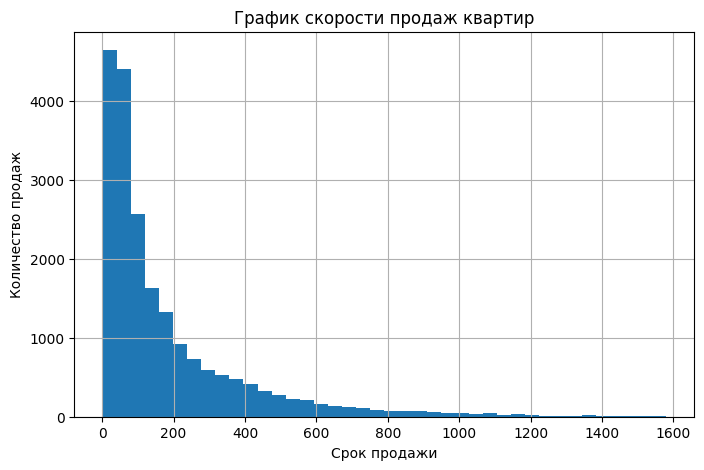

In [33]:
data['days_exposition'].hist(bins=40, figsize=(8,5),grid=True)
plt.title('График скорости продаж квартир')
plt.xlabel('Срок продажи')
plt.ylabel('Количество продаж')
print('Медиана срока продажи квартиры составляет:', data['days_exposition'].median(),'дней')
print('Средний срок продажи квартиры составляет:',np.round(data['days_exposition'].mean()),'дней')


Среднее значение в 2 раза больше медианного значения из-за аномально долгих продаж отдельных объектов, поэтому лучше ориентироваться на медианное значение. Продажа квартиры обычно занимает около 3 месяцев. От 9 месяцев продажа будет уже долгой, а больше года - необычно долгой.

## Определим, какие факторы больше всего влияют на общую стоимость объекта, а именно: общая площадь. жилая площадь, площадь кухни, количество комнат, этаж расположения, дата размещения объявления.

### Влияние общей площади на стоимость квартиры.

Коэффициент корреляции: 0.6467941747751469


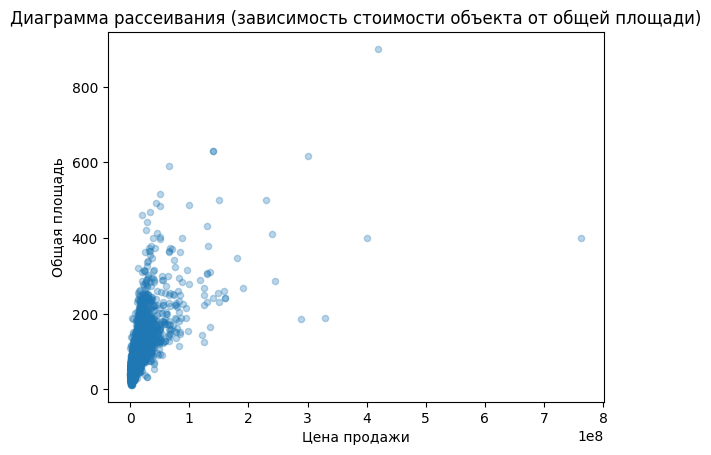

In [34]:
data.plot(x='last_price', y='total_area', kind='scatter',alpha=0.3)
plt.title('Диаграмма рассеивания (зависимость стоимости объекта от общей площади)')
plt.xlabel('Цена продажи')
plt.ylabel('Общая площадь')
print('Коэффициент корреляции:', (data['last_price'].corr(data['total_area'])))

Коэффициент корреляции составляет 0,65. Корреляция заметна для типовых объектов. Чем больше стоимость и площадь объекта, тем больше разброс и зависимость пропадает, т.к. это чаще всего уже эксклюзивные, а не типовые объекты.

### Оценим влияние жилой площади на стоимость.

Коэффициент корреляции: 0.5769939283212852


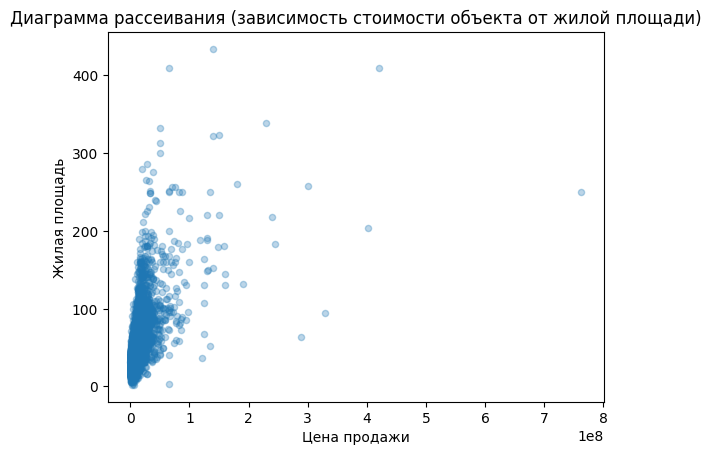

In [35]:
data.plot(x='last_price', y='living_area', kind='scatter',alpha=0.3)
plt.title('Диаграмма рассеивания (зависимость стоимости объекта от жилой площади)')
plt.xlabel('Цена продажи')
plt.ylabel('Жилая площадь')
print('Коэффициент корреляции:', (data['last_price'].corr(data['living_area'])))

Коэффициент корреляции здесь ниже и составляет 0,58. Корреляция заметна для типовых объектов. Чем больше стоимость и жилая площадь объекта, тем больше разброс и зависимость пропадает, т.к. это чаще всего уже эксклюзивные, а не типовые объекты.

### Оценим влияние площади кухни на общую стоимость.

Коэффициент корреляции: 0.477898626371838


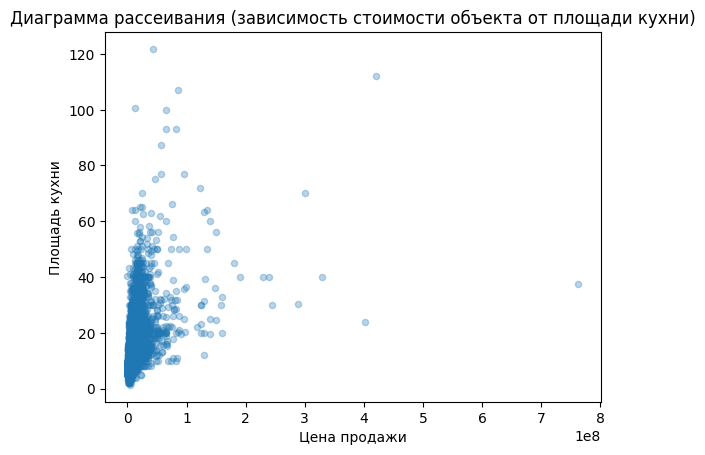

In [36]:
data.plot(x='last_price', y='kitchen_area', kind='scatter',alpha=0.3)
plt.title('Диаграмма рассеивания (зависимость стоимости объекта от площади кухни)')
plt.xlabel('Цена продажи')
plt.ylabel('Площадь кухни')
print('Коэффициент корреляции:', (data['last_price'].corr(data['kitchen_area'])))

Коэффициент корреляции здесь еще ниже и составляет 0,48. Зависимость та же.

### Оценим влияние количества комнат на общую стоимость.

In [37]:
data_room = data.groupby('rooms').agg({'last_price':['median','count']})
data_room.columns = ['median_price','count']
data_room

,median_price,count
rooms,,
0,2700000.0,196
1,3600000.0,8028
2,4770000.0,7923
3,6200000.0,5790
4,9000000.0,1177
5,13800000.0,319
6,18888500.0,102
7,24900000.0,57
8,23095000.0,12


Коэффициент корреляции: 0.35907519072823346


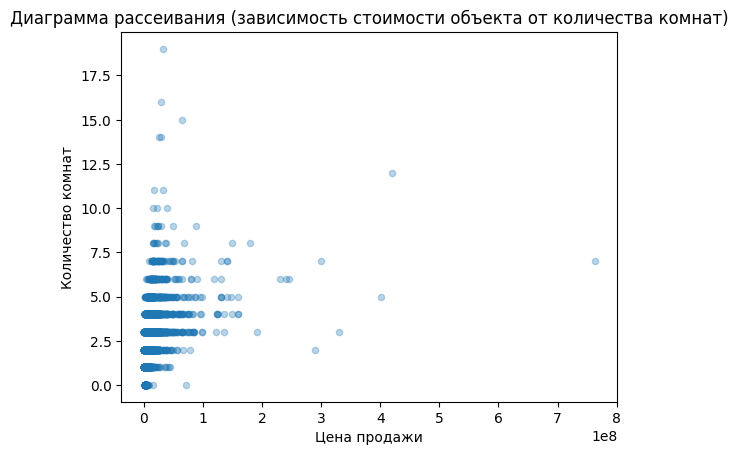

In [38]:
data.plot(x='last_price', y='rooms', kind='scatter',alpha=0.3)
plt.title('Диаграмма рассеивания (зависимость стоимости объекта от количества комнат)')
plt.xlabel('Цена продажи')
plt.ylabel('Количество комнат')
print('Коэффициент корреляции:', (data['last_price'].corr(data['rooms'])))

Коэффициент корреляции составляет 0,36. До 5 комнат корреляция почти прямая, а при большей комнатности она рассеяная, т.к. это уже нетиповые объекты, где цена формируется индивидуально.

### Оценим влияние этажа расположения на общую стоимость. 

Сгруппируем данные по виду этажа и найдем общее количество объектов и их медианное значение, которое более приближено к реальности, чем среднее из-за аномальных крайних значений.

In [39]:

data_floor = data.groupby('type_floor').agg({'last_price':['median','count']})
data_floor.columns = ['median_price','count']


In [40]:
data_floor['share'] = round(data_floor['count']*100/data_floor['count'].sum(),2)
data_floor

,median_price,count,share
type_floor,,,
другой,4850000.0,17407,73.69
первый,3900000.0,2907,12.31
последний,4300000.0,3309,14.01


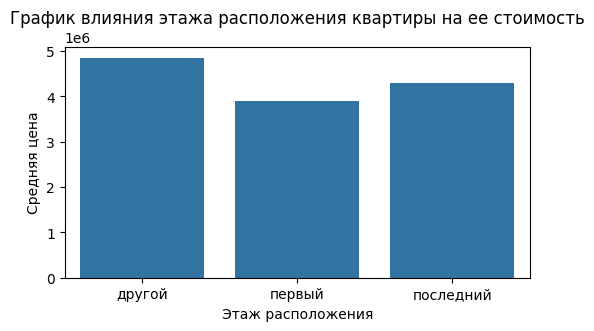

In [41]:
floor =['другой','первый','последний']
plt.figure(figsize=(6,3))
sns.barplot(x=floor, y=data_floor['median_price'])
plt.title('График влияния этажа расположения квартиры на ее стоимость')
plt.xlabel('Этаж расположения')
plt.ylabel('Средняя цена');


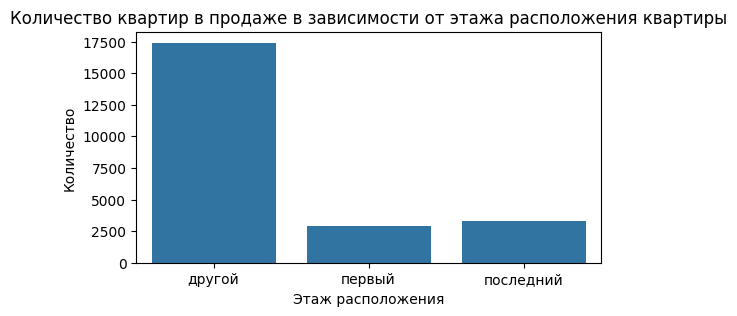

In [42]:
plt.figure(figsize=(6,3))
sns.barplot(x=floor,y=data_floor['count'])
plt.title('Количество квартир в продаже в зависимости от этажа расположения квартиры')
plt.xlabel('Этаж расположения')
plt.ylabel('Количество');

Продажи квартир на средних этажах составляют 73,69% от общего объема продаваемых квартир, на 1 этаже-12,31%, на последнем - 14,01%.  

Медианное значение стоимости квартир на первом этаже меньше значения квартир на средних этажах почти на 20%, а на последнем - на 11%. Этаж имеет существенное значение в сформировании общей стоимости объекта. Крайние этажи-дешевле.

### Определение зависимости общей стоимости от дня недели, в который размещено объявление.

In [43]:
data_day=data.groupby('day_exposition').agg({'last_price':['median','count']})
data_day.columns = ['median_price','count']
data_day.sort_values(by='median_price',ascending=False)

,median_price,count
day_exposition,,
1,4700000.0,4168
2,4700000.0,3963
0,4650000.0,3602
3,4650000.0,4275
4,4577500.0,3990
5,4550000.0,1932
6,4550000.0,1693


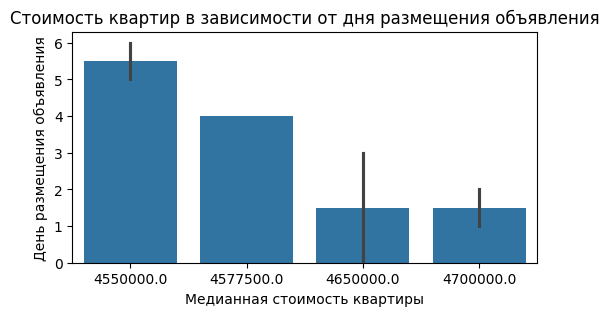

In [44]:
day_exposition = [0,1,2,3,4,5,6]
plt.figure(figsize=(6,3))
sns.barplot(x=data_day['median_price'],y=day_exposition)
plt.title('Стоимость квартир в зависимости от дня размещения объявления')
plt.xlabel('Медианная стоимость квартиры')
plt.ylabel('День размещения объявления');

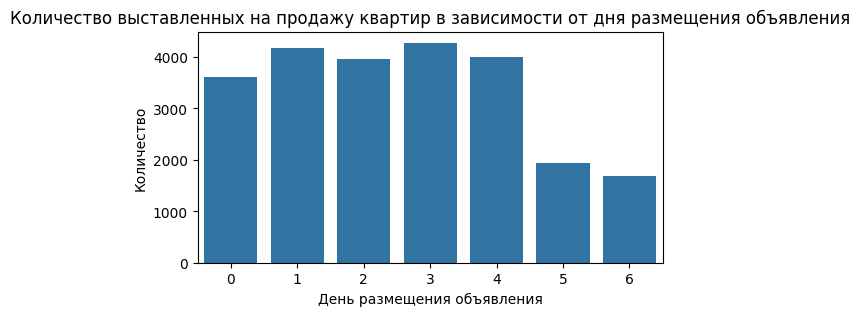

In [45]:
plt.figure(figsize=(6,3))
sns.barplot(x=day_exposition,y=data_day['count'])
plt.title('Количество выставленных на продажу квартир в зависимости от дня размещения объявления')
plt.xlabel('День размещения объявления')
plt.ylabel('Количество');

В выходные объявлений размещается почти в 2 раза меньше, чем в будние дни.  Максимальное количество объявлений размещается во вторник и четверг.

Максимальные цены устанавливают во  вторник и среду, а минимальные - в субботу и воскресенье.  



### Определение зависимости общей стоимости от месяца размещения объявления.

In [46]:
data_month=data.groupby('mounth_exposition').agg({'last_price':['median','count']})
data_month.columns = ['median_price','count']
data_month.sort_values(by='median_price',ascending=False)

,median_price,count
mounth_exposition,,
4,4800000.0,2377
12,4700000.0,1633
11,4699500.0,2362
9,4699000.0,1975
2,4650000.0,2633
3,4650000.0,2578
7,4650000.0,1685
1,4600000.0,1496
8,4570000.0,1739


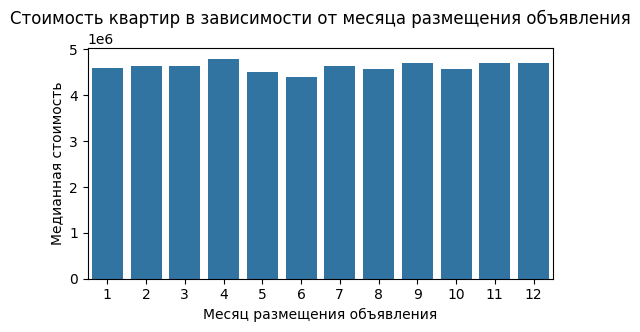

In [47]:
month_exposition = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.figure(figsize=(6,3))
sns.barplot(x=month_exposition,y=data_month['median_price'])
plt.title('Стоимость квартир в зависимости от месяца размещения объявления')
plt.xlabel('Месяц размещения объявления')
plt.ylabel('Медианная стоимость');

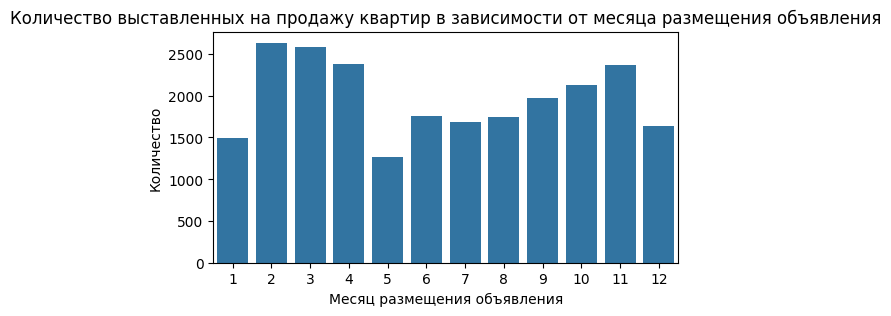

In [48]:
plt.figure(figsize=(6,3))
sns.barplot(x=month_exposition,y=data_month['count'])
plt.title('Количество выставленных на продажу квартир в зависимости от месяца размещения объявления')
plt.xlabel('Месяц размещения объявления')
plt.ylabel('Количество');

Цены в течение года практически не меняются, наибольшие ценв  в апреле, декабре и ноябре, наименьшие - в июне и мае.  

Меньше всего объявлений размещают в январе после праздников и мае из-за длительных праздников и планируемых летних отпусков. Наибольшее количество объявлений размещают в феврале-апреле, чтобы успеть продать до лета, и в ноябре, чтобы успеть продать до Нового года, т.к. люди стремятся закончить все свои дела, в т.ч. куплю-продажу квартиры до конца года.

### Определение зависимости общей стоимости от года размещения объявления.

In [49]:
data_year=data.groupby('year_exposition').agg({'last_price':['median','count']})
data_year.columns = ['median_price','count']
data_year.sort_values(by='median_price',ascending=False)

,median_price,count
year_exposition,,
2014,7640000.0,136
2015,5301000.0,1185
2019,5050000.0,2876
2016,4550000.0,2775
2018,4550000.0,8487
2017,4500000.0,8164


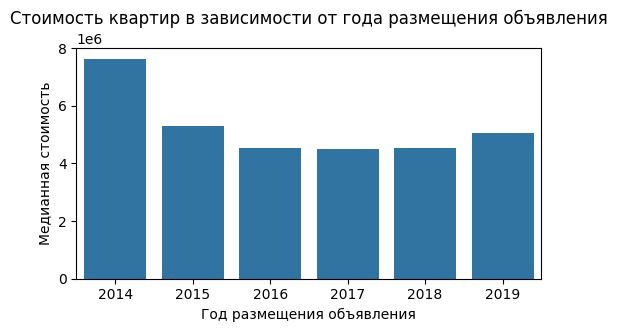

In [50]:
plt.figure(figsize=(6,3))
year_exposition = [2014,2015,2016,2017,2018,2019]
sns.barplot(x=year_exposition,y=data_year['median_price'])
plt.title('Стоимость квартир в зависимости от года размещения объявления')
plt.xlabel('Год размещения объявления')
plt.ylabel('Медианная стоимость');

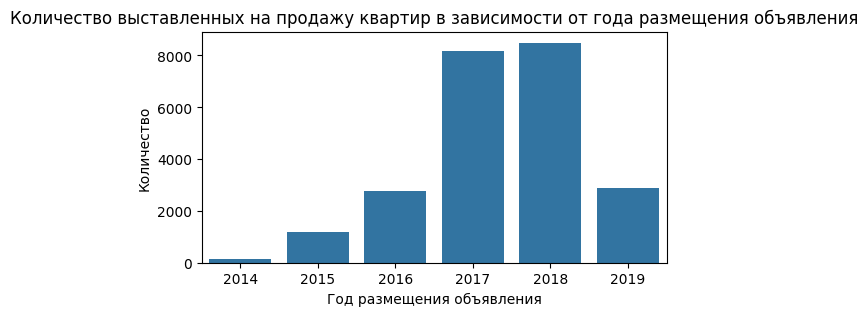

In [51]:
plt.figure(figsize=(6,3))
sns.barplot(x=year_exposition,y=data_year['count'])
plt.title('Количество выставленных на продажу квартир в зависимости от года размещения объявления')
plt.xlabel('Год размещения объявления')
plt.ylabel('Количество');

В 2014 г.объекты почти не выставлялись, а их медианная стоимость была на 60% выше, чем в 2017-2018гг.  

В 2017-2018гг., наоборот, виден резкий рост объема предложения объектов при снижении медианного значения их стоимости. Т.о., наблюдается обратная корреляция между медианной стоимостью объекта и количеством выставленных объектов. Можно предположить, что конкуренция заставляет продавцов снижать цены.

## Определим среднюю стоимость квадратного метра в 10 населенных пунктах с наибольшим количеством объявлений, а также город с наибольшей и наименьшей стоимостью квадратного метра среди отобранных. 

In [52]:
data_city = data.groupby('locality_name')['last_price'].count().sort_values(ascending=False).head(10)
data_city

locality_name
Санкт-Петербург      15668
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             396
Пушкин                 368
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 234
Name: last_price, dtype: int64

In [53]:
data_top_city = data.query('locality_name in @data_city.index')
np.round(data_top_city.pivot_table(index='locality_name', values='last_price_per_metr', aggfunc='mean')).sort_values(by='last_price_per_metr')

,last_price_per_metr
locality_name,
Выборг,58190.0
Всеволожск,68670.0
Гатчина,68746.0
Колпино,75425.0
посёлок Шушары,78677.0
посёлок Мурино,85752.0
посёлок Парголово,90176.0
деревня Кудрово,92474.0
Пушкин,103058.0


В Выборге самая низкая средняя стоимость квадратного метра 58 190р., а в Санкт-Петербурге - самая большая - 114 619р.

## Определим среднюю цену за квадратный метр жилья в Санкт-Петербурге в зависимости от удаленности на каждый километр от центра.

In [54]:
data_spb = data.loc[data['locality_name']=='Санкт-Петербург']
data_spb = data_spb.dropna(subset=['cityCenters_nearest_km'])
data_spb_km = np.round(data_spb.pivot_table(index='cityCenters_nearest_km', values='last_price_per_metr', aggfunc={'mean','count'}))
data_spb_km

,count,mean
cityCenters_nearest_km,,
0.0,25,253433.0
1.0,190,175674.0
2.0,305,155891.0
3.0,347,121291.0
4.0,679,132954.0
5.0,914,140151.0
6.0,610,149934.0
7.0,418,155997.0
8.0,595,124851.0


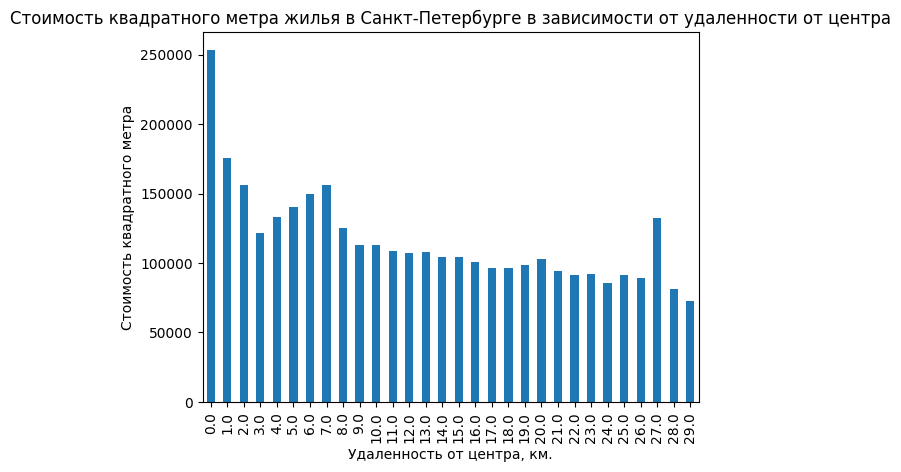

In [55]:
data_spb_km.plot(kind='bar',y='mean',legend=False)
plt.title('Стоимость квадратного метра жилья в Санкт-Петербурге в зависимости от удаленности от центра')
plt.xlabel('Удаленность от центра, км.')
plt.ylabel('Стоимость квадратного метра');

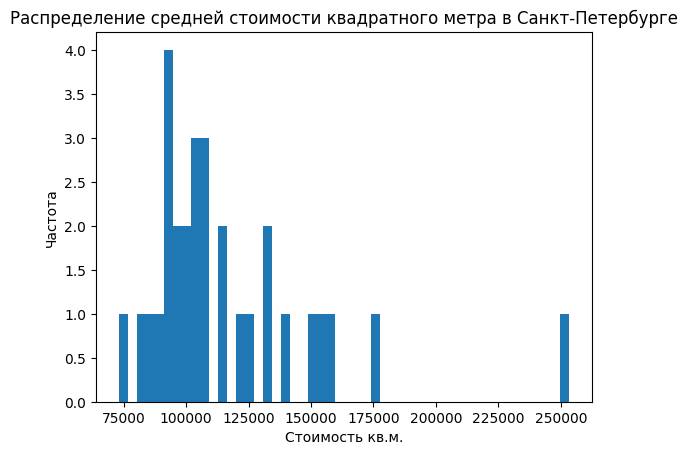

In [56]:
data_spb_km.plot(kind='hist', x='count',bins=50,legend=False)
plt.title('Распределение средней стоимости квадратного метра в Санкт-Петербурге')
plt.xlabel('Стоимость кв.м.')
plt.ylabel('Частота');

Стоимость квадратного метра, как правило, уменьшается с увеличением расстояния от центра города. После 7 км. отмечается планомерное снижение стоимости. Можно предположить, что на этом расстоянии оканчивается район, относящийся к центру города. (Также в этом районе заметен небольшой провал (от 3 до 4 км.) можно объяснить возможной непопулярностью района, который попадает в эту зону.)  
Самый дорогой по стоимости жилья район в Санкт-Петербурге риелторы назвали "Золотой треугольник". Дома "Золотого треугольника" находятся в пределах Невского проспекта, набережной реки Фонтанки и Дворцовой набережной. 

В некоторых точках удаленности от центра есть небольшие увеличения стоимости квадратного метра вместо снижения. Можно предположить, что в данных районах могут быть новые застройки, которые по стоимости выше старых, или здесь находится более престижный район. 


Средняя стоимость квадратного метра в Санкт-Петербурга в основном составляет 90-110 тыс.руб. за квадратный метр. Минимальная стоимость 73 тыс.руб. за кв.м., а максимальная стоимость порой достигает 175 тыс.руб., а иногда даже 250 тыс.руб. за кв.м. за уникальные объекты. 

# Общий вывод

Были проанализированы данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за 2014-2019гг. 

Данные содержали сведения о 23699 квартирах.   
Была проведена предобработка данных:   
1. данные приведены в читаемый вид (разделены на столбцы). 
2. в столбцах найдены пропущенные и аномальные значения и обработаны:
- «высота потолка»: исправленны данные, заведенные некорректно,  удалены аномально большие и маленькие значения, пропуски заменены медианными значениями. 
 'living_area': пропуски заполнены медианным значением, характерным для квартир с разным количеством комнат.
'kitchen_area': пропуски заполнены медианным значением, характерным для квартир с разным количеством комнат.
'balcony' пропуски заполнены значением '0', т.к. незаполнение данного столбца говорит скорее всего о том, что балкона в квартире нет.
Аналогично заполнены пропуски в столбце 'parks_around3000' и 'ponds_around3000'.
Пропуски в столбце 'is_apartment' обусловлены скорее всего тем, что объект является квартирой, а не апартаментами. Пустые значения заполним '0'.
Пропуски в столбце количества дней экспозиции и этажности дома нет возможности заполнить логически, но эти значения имеют важное значение для оценки результата, поэтому строки с пустыми значениями в этих столбцах не удалялись из выборки.
Пропуски в остальных столбцах: airports_nearest,cityCenters_nearest,parks_neares, ponds_neares, невозможно заполнить логически, поэтому пропуски оставлены как есть. Кроме того, эти параметры не так критичны для анализа поставленной задачи.
3. Явные дубликаты отсутствуют.
  Неявные дубликаты в столбе названия населенного пункта приведены к одному значению.
4. Добавлены столбцы: 
- last_price_per_metr с ценой одного квадратного метра,  
- mounth_exposition, year_exposition, обозначающие месяц и год публикации объявления,  
- day_exposition, отображающий день недели(0-понедельник, 1-вторник и так далее),  
- с типом квартиры со значениями: "первый","последний","другой",  
- с расстоянием до центра города в километрах  
5. построены гистограммы столбцов для уже очищенных данных и проанализированы.
В среднем пользователи размещают от 5 до 12 фотографий объекта, но есть достаточно большое число объявлений без фотографий.  

Общая площадь самой большой категории объектов - до 50кв.м., 2 по количеству продаваемых квартир категория - до 100кв.м. Но есть эксклюзивные объекты и более 800м.  

Пик выставленных на продажу объектов был с середины 2017 по середину 2019гг, но во второй половине 2018г. был спад.  

Выставляется на продажу примерно одинаковое количество 1 и 2-комнатных квартир, 3-комнатных значительно меньше.  

Наиболее частая высота потолков в квартирах -2,7м.  

Наиболее частая этажность домов – 5 этажей и до 10 этажей.  

Жилая площадь квартир в основном до 40 кв.м.  

Большинство объектов расположены не выше 4 этажа, значительно меньше-не выше седьмого, и совсем мало выше 10-го этажа.  

Площадь кухни в основном составляет примерно от 6 до 12 кв.м.  

Больше половины квартир продается без балконов. Либо собственники забывают указать данную информацию.  

Большинство объектов расположены на расстоянии от 10 до 50 км. от аэропорта и от 5 до 20км. от центра города(чаще 10-15км.).  

Парк в пределах 3км. есть только у 1/3 квартир на расстоянии от 0,2 до 0,75 км. Примерно та же картина с прудами. Но собственники не всегда указывают такую расширенную информацию об объектах.  

Чаще всего объекты продаются в течение 2 месяцев, в 2 раза меньше – в течение примерно 4 месяцев, в 4 раза меньше – в пределах 6-7 месяцев и очень малая часть дольше указанного срока.  

Стоимость квадратного метра в основном варьируется от 90 до 110 тыс.руб. за кв.м.  

Пика количество выставленных на продажу объектов достигает в декабре и планомерно снижается к маю(перед сезоном отпусков), а затем снова растет.  

Больше всего выставлено объектов в 2017-2018гг.. На неделе выставляется больше объектов, чем в выходные.  

6. Изучена более подробно скорость продажи квартир. Построена гистограмма и определены среднее -181 день и медианное значение- 95 дней.
Среднее значение в 2 раза отличается от медианного значения из-за аномально долгих продаж отдельных объектов, поэтому лучше ориентироваться на медианное значение. Продажа квартиры обычно занимает около 3 месяцев. От 9 месяцев продажа будет уже долгой, а больше года - необычно долгой.

7. Определено, какие факторы больше всего влияют на общую стоимость объекта, а именно: общая площадь, жилая площадь, площадь кухни, количество комнат, этаж расположения, дата размещения объявления.
- Коэффициент корреляции общей площади и стоимости составляет 0,65. Корреляция заметна для типовых объектов. Чем больше стоимость и площадь объекта, тем больше разброс и зависимость пропадает, т.к. это чаще всего уже эксклюзивные, а не типовые объекты.
- влияние жилой площади на стоимость: коэффициент корреляции здесь ниже - 0,58. Корреляция заметна для типовых объектов. Чем больше стоимость и площадь объекта, тем больше разброс и зависимость пропадает, т.к. это чаще всего уже эксклюзивные, а не типовые объекты.
- влияние площади кухни на общую стоимость: коэффициент корреляции здесь еще ниже и составляет 0,48. Зависимость та же.
- влияние количества комнат на общую стоимость: коэффициент корреляции составляет 0,36. До 5 комнат корреляция почти прямая, а при большей комнатности она рассеяная, т.к. это уже нетиповые объекты, где цена формируется индивидуально.
- влияние этажа расположения на общую стоимость: сгруппированы данные по виду этажа и найдено общее количество объектов и их медианное значение, которое более приближено к реальности, чем среднее из-за аномальных крайних значений.
Продажи квартир на средних этажах составляют 73,69% от общего объема продаваемых квартир, на 1 этаже-12,31%, на последнем - 14,01%.

Медианное значение стоимости квартир на первом этаже меньше значения квартир на средних этажах почти на 20%, а на последнем - на 11%. Этаж имеет существенное значение в сформировании общей стоимости объекта. Крайние этажи-дешевле.
- зависимость общей стоимости от даты размещения(дня недели, месяца, года)В выходные объявлений размещается почти в 2 раза меньше, чем в будние дни. Максимальное количество объявлений размещается во вторник и четверг.

Максимальные цены устанавливают во вторник и среду, а минимальные - в субботу и воскресень

Цены в течение года практически не меняются, наибольшие ценв в апреле, декабре и ноябре, наименьшие - в июне и мае.

Меньше всего объявлений размещают в январе после праздников и мае из-за длительных праздников и планируемых летних отпусков. Наибольшее количество объявлений размещают в феврале-апреле, чтобы успеть продать до лета, и в ноябре, чтобы успеть продать до Нового года, т.к. люди стремятся закончить все свои дела, в т.ч. куплю-продажу квартиры до конца год  

В 2014 г.объекты почти не выставлялись, а их медианная стоимость была на 60% выше, чем в 2017-2018гг.

В 2017-2018гг., наоборот, виден резкий рост объема предложения объектов при снижении медианного значения их стоимости. Т.о., наблюдается обратная корреляция между медианной стоимостью объекта и количеством выставленных объектов. Можно предположить, что конкуренция заставляет продавцов снижать цены.  

8.Определена средняя стоимость квадратного метра в 10 населенных пунктах с наибольшим количеством объявлений, а также город с наибольшей и наименьшей стоимость среди отобВ Выборге самая низкая средняя стоимость квадратного метра 58 190р., а в Санкт-Петербурге - самая большая - 114 619р.12 20Стоимость квадратного метра, как правило, уменьшается с увеличением расстояния от центра города. После 7 км. отмечается планомерное снижение стоимости. Можно предположить, что на этом расстоянии оканчивается район, относящийся к центру города. (Также в этом районе заметен небольшой провал (от 3 до 4 км.) можно объяснить возможной непопулярностью района, который попадает в эту зону.)
Самый дорогой по стоимости жилья район в Санкт-Петербурге риелторы назвали "Золотой треугольник". Дома "Золотого треугольника" находятся в пределах Невского проспекта, набережной реки Фонтанки и Дворцовой набережной.

В некоторых точках удаленности от центра есть небольшие увеличения стоимости квадратного метра вместо снижения. Можно предположить, что в данных районах могут быть новые застройки, которые по стоимости выше старых, или здесь находится более престижный район.

Средняя стоимость квадратного метра в Санкт-Петербурга в основном составляет 90-110 тыс.руб. за квадратный метр. Минимальная стоимость 73 тыс.руб. за кв.м., а максимальная стоимость порой достигает 175 тыс.руб., а иногда даже 250 тыс.руб. за кв.м. за уникальные объекты.